# Understanding the dataset

+ **timestamp** - timestamp field for grouping the data
+ **cnt** - the count of a new bike shares
+ **t1** - real temperature in C
+ **t2** - temperature in C "feels like"
+ **hum** - humidity in percentage
+ **windspeed** - wind speed in km/h
+ **weathercode** - category of the weather
    * *1* = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
    * *2* = scattered clouds / few clouds
    * *3* = Broken clouds
    * *4* = Cloudy
    * *7* = Rain/ light Rain shower/ Light rain
    * *10* = rain with thunderstorm
    * *26* = snowfall
+ **isholiday** - boolean field - 1 holiday / 0 non holiday
+ **isweekend** - boolean field - 1 if the day is weekend
+ **season** - category(0-spring ; 1-summer; 2-fall; 3-winter)

In [1]:
# import and install all the necessary packages

import numpy as np
import pandas as pd
import zipfile
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

# Loading dataset from kaggle

In [2]:
# download the dataset from kaggle using the kaggle API
!kaggle datasets download -d hmavrodiev/london-bike-sharing-dataset

# extract the zip file from the downloaded dataset
zipfile_name = 'london-bike-sharing-dataset.zip'
with zipfile.ZipFile(zipfile_name, 'r') as zip_ref:
    zip_ref.extractall()

# read the csv file into a pandas dataframe
dataset = pd.read_csv('london_merged.csv')

# check the dataset
dataset.info()


london-bike-sharing-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [3]:
#creating a woorking copy
bikes = dataset

#Display data
bikes

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [4]:
bikes.shape
# to show (rows, columns) count

(17414, 10)

In [5]:
# count the unique values in the 'weather_code' column
bikes.weather_code.value_counts()

#the_value the_count

weather_code
1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: count, dtype: int64

In [6]:
# count the unique values in the season column
bikes.season.value_counts()

#the_value the_count

season
0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: count, dtype: int64

# Cleaning Data

In [7]:
# checking for any missing values (null values)
missing_values = bikes.isnull().sum()
print("Missing data are:")
print("Column Name   Total Missing Values")
print(missing_values)

Missing data are:
Column Name   Total Missing Values
timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64


In [8]:
# convert "is_holiday" and "is_weekend" to categorical data type
bikes.is_holiday = bikes.is_holiday.astype(bool)
bikes.is_weekend = bikes.is_weekend.astype(bool)


# convert the "timestamp" column to datetime datatype
bikes.timestamp = pd.to_datetime(bikes.timestamp)


In [9]:
# check the changes
bikes

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,False,True,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,False,True,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,False,True,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,False,True,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,False,True,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,False,False,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,False,False,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,False,False,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,False,False,3.0


# Processing Data

In [10]:
# change column name to appropriate names
bikes_dict = {
    'timestamp': 'time',
    'cnt': 'count',
    't1': 'temperature',
    't2': 'feels_like_temperature',
    'hum': 'humidity_percentage',
    'wind_speed': 'wind_speed_kph',
    'weather_code': 'weather',
    'is_holiday': 'is_holiday',
    'is_weekend': 'is_weekend',
    'season': 'season'
}

bikes.rename(columns=bikes_dict, inplace=True)

In [11]:
# convert humidity to percentage (between 0 and 1)
bikes.humidity_percentage = bikes.humidity_percentage / 100

In [12]:
# creating season dictionary to map the season column (number to season name)
season_dict = {
    0.0:'spring',
    1.0:'summer',
    2.0:'autumn',
    3.0:'winter'
}

# creating weather dictionary to map the weather column (number to weather name)
weather_dict = {
    1.0:'Clear',
    2.0:'Scattered clouds',
    3.0:'Broken clouds',
    4.0:'Cloudy',
    7.0:'Rain',
    10.0:'Rain with thunderstorm',
    26.0:'Snowfall',
    94.0:'Freezing Fog'
}


In [13]:
# mapping the season and weather columns
bikes.season = bikes.season.map(season_dict) #.astype('category')

bikes.weather = bikes.weather.map(weather_dict) #.astype('category')

In [14]:
# Extract month from 'time' and create a new column 'month'

bikes['month'] = bikes['time'].dt.to_period("M")

In [15]:
# check the changes
bikes.head()

,time,count,temperature,feels_like_temperature,humidity_percentage,wind_speed_kph,weather,is_holiday,is_weekend,season,month
0,2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,Broken clouds,False,True,winter,2015-01
1,2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,Clear,False,True,winter,2015-01
2,2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,Clear,False,True,winter,2015-01
3,2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,Clear,False,True,winter,2015-01
4,2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,Clear,False,True,winter,2015-01


# Visualizations

In [16]:
# import the necessary packages for visualization

# !pip install seaborn
# !pip install matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

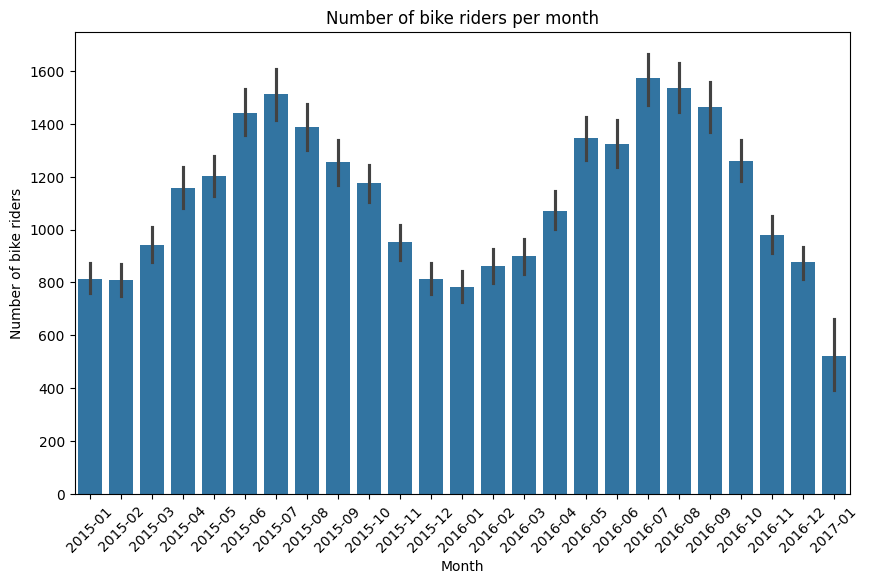

In [17]:
# 1 - visulaize number of bike rider per month
plt.figure(figsize=(10, 6))

sns.barplot(x='month', y='count', data=bikes)
plt.title('Number of bike riders per month')
plt.xlabel('Month')
plt.ylabel('Number of bike riders')
plt.xticks(rotation = 45)

plt.show()

#####  Analysis:

1. Ridership peaks in the summer months (June, July, August), likely due to warmer weather and longer daylight hours.
2. Ridership dips in the winter months (December, January, February), likely due to colder temperatures and shorter days.
3. There's some variability in ridership even within the same season, suggesting other factors may also influence ridership, such as weather conditions, events, or promotions.

#####  Conclusions:

+ Seasonal patterns play a significant role in ridership, with higher numbers in summer and lower numbers in winter.
+ Other factors, such as weather conditions and events, may also influence ridership within seasons.

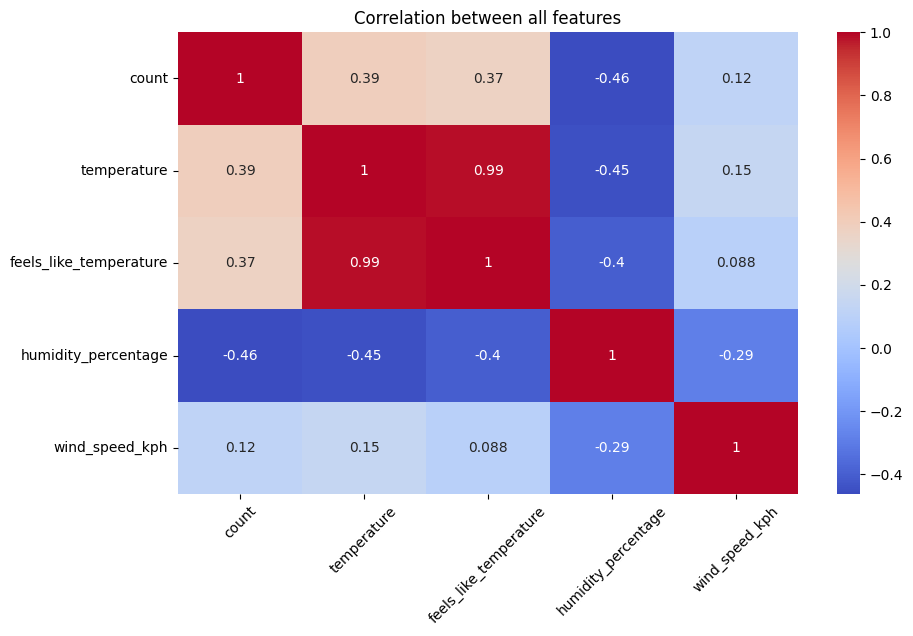

In [18]:
# 2 - visualize correlation heatmap between all features

plt.figure(figsize=(10, 6))

correlation_matrix = bikes[['count', 'temperature', 'feels_like_temperature', 'humidity_percentage', 'wind_speed_kph']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between all features')
plt.xticks(rotation = 45)

plt.show()

#####  Analysis:

1. Positive correlations:
    * Temperature: The strongest positive correlation is with temperature (0.39) to the count of riders. This means that as the temperature increases, the number of bike rides also increases. This is likely because people are more comfortable and enjoyable to bike in warmer weather.
    * Feels like temperature: There is also a positive correlation with "feels like" temperature (0.37), which suggests that perceived temperature may be just as important as actual temperature in influencing ridership.
    * Wind speed: There is a weak positive correlation with wind speed (0.12). This could be because a slight tailwind can make cycling easier, but strong winds may deter people from biking.
    
2. Negative correlations:
    * Humidity: There is a moderate negative correlation with humidity (-0.46). This means that as humidity increases, the number of bike rides decreases. This could be because people find cycling less comfortable in humid weather.
    
    
#####  Conclusions:

+ Warm and dry weather encourages biking: Higher temperatures and lower humidity correlate with a higher number of bike rides. This suggests people prefer comfortable conditions for cycling.
+ Rain and humidity discourage biking: Strong negative correlations with precipitation and rain with thunderstorms indicate a clear deterrent effect on ridership.
+ Other factors like wind speed have smaller impacts: A weak positive correlation with wind speed suggests a slight influence, but not as significant as temperature and humidity.

+ This analysis shows associations, not causal relationships. Factors like seasonality and urban infrastructure may also play a role.

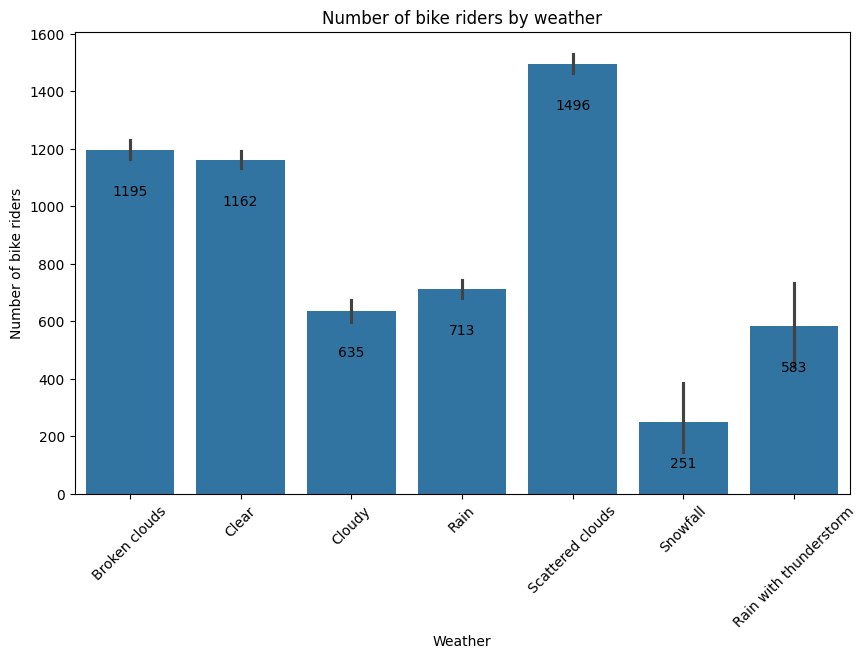

In [19]:
# 3 - visualize number of bike riders by weather
plt.figure(figsize=(10, 6))

ax = sns.barplot(x='weather', y='count', data=bikes)

plt.title('Number of bike riders by weather')
plt.xlabel('Weather')
plt.ylabel('Number of bike riders')
plt.xticks(rotation=45)

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, -30), textcoords='offset points')


plt.show()

#####  Analysis:

1. Clear skies and broken clouds are most popular for biking: The highest number of bike riders, 1496, is observed during roken clouds skies, followed closely by 1195 riders during broken clouds side to side with clear skies of 1162. This suggests that people generally prefer to bike when there's ample sunshine or partial cloud cover.

2. Rain, snowfall and thunderstorms significantly reduce ridership: Rain with thunderstorm and snowfall have the most dramatic impact on ridership, with only 583 and 251 riders, respectively. This is likely due to safety concerns, discomfort, and reduced visibility during these conditions.

#####  Conclusions:

+ Weather conditions play a significant role in bike ridership.
+ Clear skies and scattered clouds are the most favorable for biking.
+ Rain, thunderstorms, and snowfall have a negative impact on ridership.




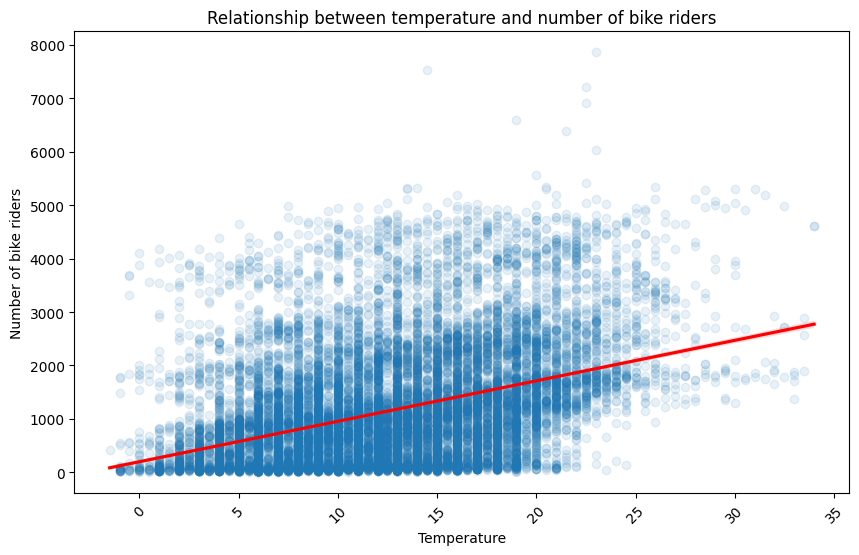

In [20]:
# 4 - visualize relationship between temperature and number of bike riders
plt.figure(figsize=(10, 6))

sns.regplot(x='temperature', y='count', data=bikes, scatter_kws = {'alpha':0.1}, line_kws = {'color': 'red'})
plt.title('Relationship between temperature and number of bike riders')
plt.xlabel('Temperature')
plt.ylabel('Number of bike riders')

plt.xticks(rotation = 45)

plt.show()

#####  Analysis:

1. The data points form a roughly upward-sloping trendline, indicating a positive correlation.
2. There is a noticeable increase in the number of bike riders above 15 degrees Fahrenheit.
3. The number of bike riders appears to plateau or even decrease slightly at the highest temperatures.

#####  Conclusions:

+ Comfort: People are more likely to bike when the weather is comfortable. When it is too cold or hot, they may choose to stay indoors or use another mode of transportation.
+ Safety: Biking can be dangerous in extreme weather conditions, such as ice or snow. People may be less likely to bike when the weather is unsafe.
+ Enjoyment: Biking can be a more enjoyable activity when the weather is pleasant. People may be more likely to bike when they know they will have a good time.

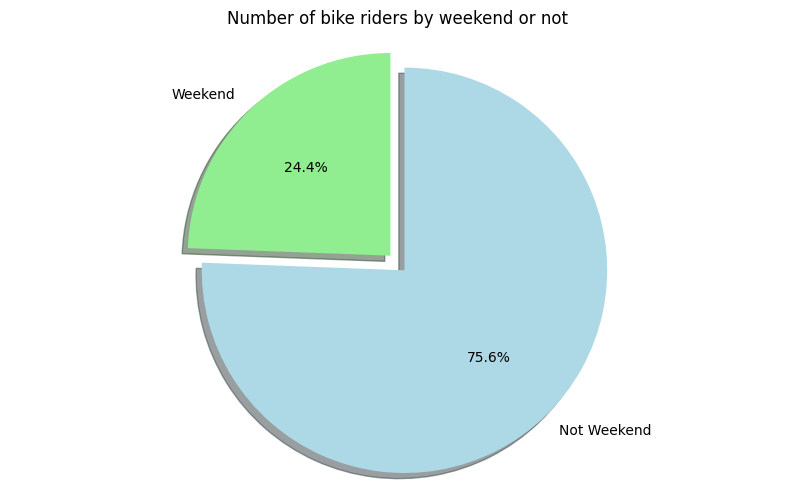

(4857756, 15048216)

In [24]:

# 5 - visualize number of bike riders by weekend or not in pie chart form


# get the number of bike riders by weekend or not
bike_riders_is_weekend = []
bike_riders_not_weekend = []

for index, row in bikes.iterrows():
    if row['is_weekend']:
        bike_riders_is_weekend.append(row['count'])
    else:
        bike_riders_not_weekend.append(row['count'])

# visualize the number of bike riders by weekend or not in pie chart form
        
plt.figure(figsize=(10, 6))

labels = ['Weekend', 'Not Weekend']
data = (sum(bike_riders_is_weekend), sum(bike_riders_not_weekend)  )
colors = ['lightgreen', 'lightblue']
explode = (0.1, 0)

plt.pie(data, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Number of bike riders by weekend or not')
plt.axis('equal')

plt.show()

##### Analysis:

1. Number of riders in weekdays is triple number of riders in the weekend days

##### Conclusions:

+ The significant majority of bike riders (75.6%) prefer riding on weekdays compared to weekends (24.4%). The reasons for this distribution could vary and might be influenced by factors such as commuting patterns, work schedules, or other external factors.